# Customer Churn Prediction

Churn prediction means detecting which customers are likely to leave a service or to cancel a subscription to a service. It is a critical prediction for many businesses because acquiring new clients often costs more than retaining existing ones.



We have been provided with a dataset in which we have to predict whether a customer will change it's telecommunications provider.<br>
The dataset is taken from the following link: https://www.kaggle.com/competitions/customer-churn-prediction-2020/overview<br><br>

The training dataset contains 4250 samples. Each sample contains 19 features and 1 boolean variable "churn" which indicates the class of the sample. The 19 input features and 1 target variable are:<br>

1. <b>state:</b> string. 2-letter code of the US state of customer residence
2. <b>account_length:</b> Number of months the customer has been with the current telco provider
3. <b>area_code:</b> area_code_AAA" where AAA = 3 digit area code
4. <b> international_plan: </b> The customer has international plan.
5. <b>voice_mail_plan: </b>  The customer has voice mail plan.
6. <b>number_vmail_messages: </b> Number of voice-mail messages.
7. <b>total_day_minutes: </b> Total minutes of day calls.
8. <b>total_day_calls: </b>  Total minutes of day calls.
9. <b>total_day_charge: </b>  Total charge of day calls.
10. <b>total_eve_minutes: </b> Total minutes of evening calls.
11. <b>total_eve_calls: </b> Total number of evening calls.
12. <b>total_eve_charge: </b>Total charge of evening calls.
13. <b>total_night_minutes: </b>  Total minutes of night calls.
14. <b>total_night_calls: </b> Total number of night calls.
15. <b>total_night_charge: </b>  Total charge of night calls.
16. <b>total_intl_minutes: </b>  Total minutes of international calls.
17. <b>total_intl_calls: </b> Total number of international calls.
18. <b>total_intl_charge: </b>  Total charge of international calls
19. <b>number_customer_service_calls: </b> Number of calls to customer service
20. <b>churn: </b> Customer churn - target variable


### <b> Dataset: </b>
* <b> train.csv: </b>  the training set.<br>
Contains 4250 lines with 20 columns. 3652 samples (85.93%) belong to class churn=no and 598 samples (14.07%) belong to class churn=yes.<br>
* <b> test.csv: </b> the test set.<br>
Contains 750 lines with 20 columns: the index of each sample and the 19 features (missing the target variable "churn").


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline






In [22]:
train_data = pd.read_csv('train_dataset.csv')
train_data

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4245,MT,83,area_code_415,no,no,0,188.3,70,32.01,243.8,88,20.72,213.7,79,9.62,10.3,6,2.78,0,no
4246,WV,73,area_code_408,no,no,0,177.9,89,30.24,131.2,82,11.15,186.2,89,8.38,11.5,6,3.11,3,no
4247,NC,75,area_code_408,no,no,0,170.7,101,29.02,193.1,126,16.41,129.1,104,5.81,6.9,7,1.86,1,no
4248,HI,50,area_code_408,no,yes,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,no


In [23]:
train_data.shape 

(4250, 20)

In [24]:
train_data.dtypes

state                             object
account_length                     int64
area_code                         object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                             object
dtype: object

In [25]:
def Preparedata(train_data):
  train_data['international_plan'].replace({'no': 0, 'yes': 1}, inplace = True)
  train_data['churn'].replace({'no': 0, 'yes': 1}, inplace = True)
  train_data['voice_mail_plan'].replace({'no':0, 'yes': 1}, inplace = True)

  train_data.drop(columns=['state', 'area_code'], inplace=True)

  train_data['total_minutes'] = train_data['total_day_minutes'] + train_data['total_eve_minutes'] + train_data['total_night_minutes']
  train_data['total_calls'] = train_data['total_day_calls'] + train_data['total_eve_calls'] + train_data['total_night_calls']
  train_data['total_charge'] = train_data['total_day_charge'] + train_data['total_eve_charge'] + train_data['total_night_charge']

  train_data.drop(columns = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_day_calls', 'total_eve_calls', 'total_night_calls',
                                'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls'], inplace=True)
  return train_data


def inoutdata(data):
  y = train_data['churn']
  x = train_data.drop(columns=['churn'], axis = 1)

  return x, y

In [26]:
train_data = Preparedata(train_data)
train_data

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,churn,total_minutes,total_calls,total_charge
0,107,0,1,26,3.70,1,0,611.5,329,55.54
1,137,0,0,0,3.29,0,0,527.2,328,59.00
2,84,1,0,0,1.78,2,0,558.2,248,65.02
3,75,1,0,0,2.73,3,0,501.9,356,49.36
4,121,0,1,24,2.03,3,0,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,2.78,0,0,645.8,237,62.35
4246,73,0,0,0,3.11,3,0,495.3,260,49.77
4247,75,0,0,0,1.86,1,0,492.9,331,51.24
4248,50,0,1,40,2.67,2,0,756.2,369,72.42


In [27]:
x,y = inoutdata(train_data)

## Training Data

In [28]:
x

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge
0,107,0,1,26,3.70,1,611.5,329,55.54
1,137,0,0,0,3.29,0,527.2,328,59.00
2,84,1,0,0,1.78,2,558.2,248,65.02
3,75,1,0,0,2.73,3,501.9,356,49.36
4,121,0,1,24,2.03,3,779.3,314,76.28
...,...,...,...,...,...,...,...,...,...
4245,83,0,0,0,2.78,0,645.8,237,62.35
4246,73,0,0,0,3.11,3,495.3,260,49.77
4247,75,0,0,0,1.86,1,492.9,331,51.24
4248,50,0,1,40,2.67,2,756.2,369,72.42


In [29]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.15, random_state=42)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3612, 9), (638, 9), (3612,), (638,))

### DecisionTreeClassifier

In [31]:
def Model(X_train, X_test, y_train, y_test, y_pred):
  #Precision, accuracy, f1_score
  print("Accuracy:",accuracy_score(y_test, y_pred))
  print("Precision: ", precision_score(y_test, y_pred))
  print("f1_score: ", f1_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))

def Confusion_Matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
  disp.plot()
  plt.show()




In [32]:
decision_tree = DecisionTreeClassifier()
decision_tree = decision_tree.fit(X_train, y_train)
dtc_predict = decision_tree.predict(X_test)

In [33]:
Model(X_train, X_test, y_train, y_test, dtc_predict)

Accuracy: 0.9373040752351097
Precision:  0.7904761904761904
f1_score:  0.8058252427184466
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       537
           1       0.79      0.82      0.81       101

    accuracy                           0.94       638
   macro avg       0.88      0.89      0.88       638
weighted avg       0.94      0.94      0.94       638



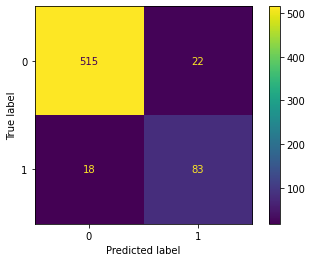

In [34]:
Confusion_Matrix(y_test, dtc_predict)

### RandomForestTree

In [35]:
RF = RandomForestClassifier(n_estimators=20, random_state=42)
RF = RF.fit(X_train, y_train)
y_predict = RF.predict(X_test)


In [36]:
Model(X_train, X_test, y_train, y_test, y_predict)

Accuracy: 0.9498432601880877
Precision:  0.9058823529411765
f1_score:  0.8279569892473118
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       537
           1       0.91      0.76      0.83       101

    accuracy                           0.95       638
   macro avg       0.93      0.87      0.90       638
weighted avg       0.95      0.95      0.95       638



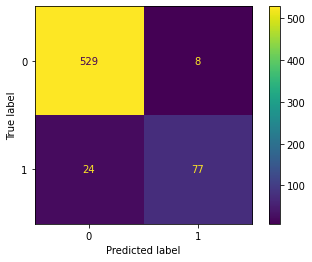

In [37]:
Confusion_Matrix(y_test, y_predict)

### SVM

In [38]:
clf = SVC(kernel='rbf')
clf = clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)

In [39]:
Model(X_train, X_test, y_train, y_test, clf_predict)

Accuracy: 0.841692789968652
Precision:  0.0
f1_score:  0.0
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       537
           1       0.00      0.00      0.00       101

    accuracy                           0.84       638
   macro avg       0.42      0.50      0.46       638
weighted avg       0.71      0.84      0.77       638



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

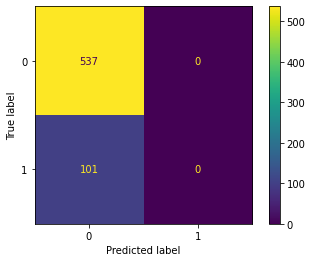

In [40]:
Confusion_Matrix(y_test, clf_predict)

### KNeighborsClassifier

In [41]:
knn_r_acc = []
for i in range(1,17,1):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    test_score = knn.score(X_test,y_test)
    train_score = knn.score(X_train,y_train)
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.794671     1.000000
1    2    0.857367     0.910576
2    3    0.836991     0.914175
3    4    0.849530     0.898117
4    5    0.852665     0.899779
5    6    0.858934     0.891750
6    7    0.863636     0.893411
7    8    0.858934     0.890919
8    9    0.862069     0.888704
9   10    0.865204     0.888981
10  11    0.866771     0.888151
11  12    0.866771     0.887597
12  13    0.865204     0.887597
13  14    0.862069     0.886489
14  15    0.860502     0.887043
15  16    0.862069     0.884275


In [42]:
from sklearn import neighbors
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
knn_predict = knn.predict(X_test)

In [43]:
Model(X_train, X_test, y_train, y_test, knn_predict)

Accuracy: 0.8589341692789969
Precision:  0.72
f1_score:  0.28571428571428575
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       537
           1       0.72      0.18      0.29       101

    accuracy                           0.86       638
   macro avg       0.79      0.58      0.60       638
weighted avg       0.84      0.86      0.82       638



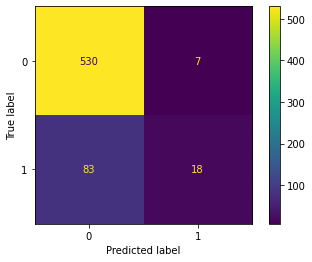

In [44]:
Confusion_Matrix(y_test,  knn_predict)

## Esemble Learning - Voting Based

Please refer to the following link: 
1. https://www.datacamp.com/tutorial/ensemble-learning-python
2. https://www.youtube.com/watch?v=0BGLfYY26zQ&t=752s
3. https://www.youtube.com/watch?v=_cDl0TFICJY

In [45]:
from sklearn import pipeline
models = list()

decision_tree = Pipeline([('m', DecisionTreeClassifier())])
models.append(('decision', decision_tree))

random_forest =  Pipeline([('m', RandomForestClassifier(n_estimators=20, random_state=42))])
models.append(('randomforest', random_forest))

svc = Pipeline([('m', SVC())])
models.append(('svc', svc))

knn = Pipeline([('m', KNeighborsClassifier())])
models.append(('knn', knn))

esemble = VotingClassifier(estimators=models, voting='hard')


In [46]:
esemble.fit(x, y)

VotingClassifier(estimators=[('decision',
                              Pipeline(steps=[('m',
                                               DecisionTreeClassifier())])),
                             ('randomforest',
                              Pipeline(steps=[('m',
                                               RandomForestClassifier(n_estimators=20,
                                                                      random_state=42))])),
                             ('svc', Pipeline(steps=[('m', SVC())])),
                             ('knn',
                              Pipeline(steps=[('m', KNeighborsClassifier())]))])

In [47]:
kfold = KFold(n_splits=20)
acc_score = cross_val_score(esemble, x, y, cv=kfold, scoring='accuracy')
prec_score = cross_val_score(esemble, x,y, cv =kfold, scoring='precision')

In [48]:
print(acc_score.mean())

0.8941181681282666


### Prediction on Test Data

In [49]:
test_data = pd.read_csv('test_dataset.csv')
test_data

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,746,GA,130,area_code_415,no,no,0,119.4,99,20.30,226.3,97,19.24,202.7,111,9.12,11.3,7,3.05,0
746,747,WA,73,area_code_408,no,no,0,177.2,118,30.12,270.5,84,22.99,241.8,112,10.88,12.3,2,3.32,3
747,748,WV,152,area_code_415,no,no,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3
748,749,DC,61,area_code_415,no,no,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1


In [50]:
test_data['international_plan'].replace({'no': 0, 'yes': 1}, inplace = True)
test_data['voice_mail_plan'].replace({'no':0, 'yes': 1}, inplace = True)

test_data.drop(columns=['state', 'area_code'], inplace=True)

test_data['total_minutes'] = test_data['total_day_minutes'] + test_data['total_eve_minutes'] + test_data['total_night_minutes']
test_data['total_calls'] = test_data['total_day_calls'] + test_data['total_eve_calls'] + test_data['total_night_calls']
test_data['total_charge'] = test_data['total_day_charge'] + test_data['total_eve_charge'] + test_data['total_night_charge']

test_data.drop(columns = ['total_day_minutes', 'total_eve_minutes', 'total_night_minutes', 'total_day_calls', 'total_eve_calls', 'total_night_calls',
                                'total_day_charge', 'total_eve_charge', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls'], inplace=True)
test_data

,id,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge
0,1,128,0,1,25,2.70,1,707.2,300,72.86
1,2,118,1,0,0,1.70,0,647.9,317,65.91
2,3,62,0,0,0,3.54,4,630.9,245,55.77
3,4,93,0,0,0,2.19,3,538.5,346,56.80
4,5,174,0,0,0,4.19,3,652.1,303,55.96
...,...,...,...,...,...,...,...,...,...,...
745,746,130,0,0,0,3.05,0,548.4,307,48.66
746,747,73,0,0,0,3.32,3,689.5,314,63.99
747,748,152,0,0,0,3.97,3,654.6,276,62.75
748,749,61,0,0,0,3.67,1,525.8,314,48.15


In [51]:
test_data_prep = test_data.drop(columns = ['id'], axis = 1)

In [52]:
test_data_prep

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge
0,128,0,1,25,2.70,1,707.2,300,72.86
1,118,1,0,0,1.70,0,647.9,317,65.91
2,62,0,0,0,3.54,4,630.9,245,55.77
3,93,0,0,0,2.19,3,538.5,346,56.80
4,174,0,0,0,4.19,3,652.1,303,55.96
...,...,...,...,...,...,...,...,...,...
745,130,0,0,0,3.05,0,548.4,307,48.66
746,73,0,0,0,3.32,3,689.5,314,63.99
747,152,0,0,0,3.97,3,654.6,276,62.75
748,61,0,0,0,3.67,1,525.8,314,48.15


In [53]:
result = esemble.predict(test_data_prep)
result

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [54]:
final_result = pd.DataFrame()
final_result['id'] = test_data['id']
final_result['Churn'] = list(result)
final_result['Churn'].replace({0: 'no', 1: 'yes'}, inplace=True)
final_result


,id,Churn
0,1,no
1,2,no
2,3,no
3,4,no
4,5,no
...,...,...
745,746,no
746,747,no
747,748,no
748,749,no


## Deploying the Model

In [55]:
#Saving our model
import pickle

Churn_file = "Churn_Prediction_model.pkl"
with open(Churn_file, 'wb') as file:
  pickle.dump(esemble, file)


